In [1]:
import pandas as pd
import numpy as np

# Number of samples
n_samples = 200

# Define categories for each feature
categories = {
    'Energy_Level': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Mood': ['Very Sad', 'Sad', 'Neutral', 'Happy', 'Very Happy'],
    'Appetite': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Sleep_Quality': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Digestion': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Stress_Level': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Concentration': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Physical_Activity': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Hydration': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Mood_Swings': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Body_Temperature': ['Very Cold', 'Cold', 'Normal', 'Warm', 'Hot'],
    'Metabolism': ['Very Slow', 'Slow', 'Moderate', 'Fast', 'Very Fast'],
    'Immunity': ['Very Weak', 'Weak', 'Average', 'Strong', 'Very Strong'],
    'Thirst_Level': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Flexibility': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent']
}

# Map each category to a numeric score for target calculation
score_map = {
    'Very Low': 1, 'Low': 2, 'Moderate': 3, 'High': 4, 'Very High': 5,
    'Very Sad': 1, 'Sad': 2, 'Neutral': 3, 'Happy': 4, 'Very Happy': 5,
    'Very Poor': 1, 'Poor': 2, 'Average': 3, 'Good': 4, 'Excellent': 5,
    'Very Cold': 1, 'Cold': 2, 'Normal': 3, 'Warm': 4, 'Hot': 5,
    'Very Slow': 1, 'Slow': 2, 'Moderate': 3, 'Fast': 4, 'Very Fast': 5,
    'Very Weak': 1, 'Weak': 2, 'Average': 3, 'Strong': 4, 'Very Strong': 5
}

# Create synthetic dataset
data = {}
for feature, cats in categories.items():
    data[feature] = np.random.choice(cats, n_samples)

df = pd.DataFrame(data)

# Calculate realistic Kapha levels (lower physical activity, slow metabolism, high stress increases Kapha)
def calculate_kapha(row):
    factors = [
        6 - score_map[row['Energy_Level']],  # Low energy → high Kapha
        6 - score_map[row['Appetite']],      # Low appetite → high Kapha
        6 - score_map[row['Digestion']],     # Poor digestion → high Kapha
        score_map[row['Stress_Level']],      # High stress → high Kapha
        6 - score_map[row['Physical_Activity']],  # Low activity → high Kapha
        6 - score_map[row['Metabolism']],    # Slow metabolism → high Kapha
        6 - score_map[row['Concentration']]  # Low concentration → high Kapha
    ]
    kapha_percent = (sum(factors) / (len(factors)*5)) * 100  # Normalize to 0-100%
    return round(kapha_percent, 1)

# Calculate realistic overall improvement (higher energy, digestion, sleep, immunity → better improvement)
def calculate_improvement(row):
    factors = [
        score_map[row['Energy_Level']],
        score_map[row['Appetite']],
        score_map[row['Digestion']],
        score_map[row['Sleep_Quality']],
        score_map[row['Metabolism']],
        score_map[row['Immunity']]
    ]
    improvement_percent = (sum(factors) / (len(factors)*5)) * 100  # Normalize to 0-100%
    return round(improvement_percent, 1)

df['Kapha_Level'] = df.apply(calculate_kapha, axis=1)
df['Overall_Improvement'] = df.apply(calculate_improvement, axis=1)

df.to_excel('Vamana_Feedback_Synthetic.xlsx', index=False)
print(df.head(10))


  Energy_Level        Mood   Appetite Sleep_Quality  Digestion Stress_Level  \
0         High    Very Sad   Moderate     Excellent  Very Poor         High   
1     Very Low  Very Happy  Very High     Excellent       Good    Very High   
2         High         Sad  Very High     Excellent       Poor    Very High   
3     Moderate       Happy   Very Low          Poor  Excellent    Very High   
4          Low  Very Happy       High       Average       Poor    Very High   
5     Moderate         Sad   Moderate     Excellent       Good    Very High   
6         High     Neutral   Very Low       Average    Average     Very Low   
7     Moderate     Neutral   Very Low          Good       Poor         High   
8     Very Low         Sad   Moderate          Good  Excellent          Low   
9    Very High       Happy        Low     Excellent  Excellent     Very Low   

  Concentration Physical_Activity  Hydration Mood_Swings Body_Temperature  \
0     Very Poor              High       High   Very H

In [2]:
import pandas as pandas 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
import pickle

In [3]:
df=pd.read_excel('Vamana_Feedback_Synthetic.xlsx')

In [4]:
df

,Energy_Level,Mood,Appetite,Sleep_Quality,Digestion,Stress_Level,Concentration,Physical_Activity,Hydration,Mood_Swings,Body_Temperature,Metabolism,Immunity,Thirst_Level,Flexibility,Kapha_Level,Overall_Improvement
0,High,Very Sad,Moderate,Excellent,Very Poor,High,Very Poor,High,High,Very High,Hot,Slow,Strong,Very Low,Average,71.4,63.3
1,Very Low,Very Happy,Very High,Excellent,Good,Very High,Excellent,High,Very High,Very High,Normal,Very Slow,Very Strong,Low,Good,60.0,70.0
2,High,Sad,Very High,Excellent,Poor,Very High,Poor,High,Very Low,Moderate,Hot,Moderate,Very Weak,Very Low,Average,60.0,66.7
3,Moderate,Happy,Very Low,Poor,Excellent,Very High,Average,Moderate,Very Low,High,Hot,Very Fast,Very Weak,Very High,Poor,60.0,56.7
4,Low,Very Happy,High,Average,Poor,Very High,Excellent,Low,Very Low,Moderate,Hot,Slow,Weak,Very Low,Very Poor,68.6,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,High,Very Happy,Low,Very Poor,Average,Low,Average,High,High,Very High,Very Cold,Fast,Very Weak,Very Low,Very Poor,51.4,50.0
196,Very High,Sad,Very High,Good,Excellent,Low,Very Poor,Very High,Moderate,Low,Hot,Fast,Strong,Very Low,Poor,37.1,90.0
197,Moderate,Sad,Very Low,Poor,Excellent,Very Low,Poor,Very High,Moderate,Very Low,Hot,Slow,Very Weak,Very Low,Poor,54.3,46.7
198,Very Low,Very Happy,High,Very Poor,Poor,Very High,Poor,Very High,Low,Very High,Cold,Moderate,Very Strong,High,Good,68.6,53.3


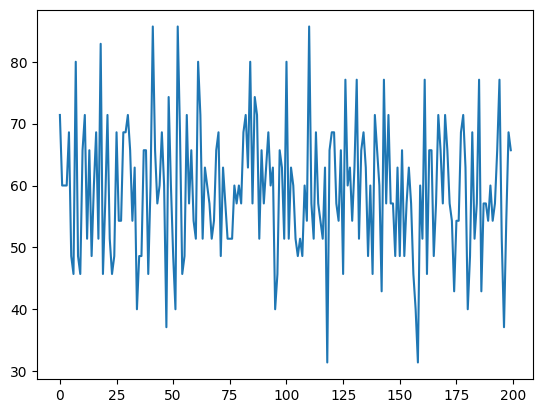

In [5]:
 plt.plot(df['Kapha_Level'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Energy_Level         200 non-null    object 
 1   Mood                 200 non-null    object 
 2   Appetite             200 non-null    object 
 3   Sleep_Quality        200 non-null    object 
 4   Digestion            200 non-null    object 
 5   Stress_Level         200 non-null    object 
 6   Concentration        200 non-null    object 
 7   Physical_Activity    200 non-null    object 
 8   Hydration            200 non-null    object 
 9   Mood_Swings          200 non-null    object 
 10  Body_Temperature     200 non-null    object 
 11  Metabolism           200 non-null    object 
 12  Immunity             200 non-null    object 
 13  Thirst_Level         200 non-null    object 
 14  Flexibility          200 non-null    object 
 15  Kapha_Level          200 non-null    flo

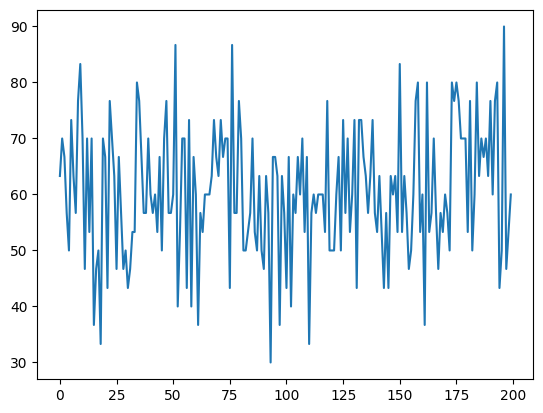

In [7]:
plt.plot(df['Overall_Improvement'])

In [8]:
features=[ col  for col in df.columns if df[col].dtype=='object']
target=[col for col in df.columns if df[col].dtype=='float64']
order_map = {
    "Concentration": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Sleep_Quality": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Digestion": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Flexibility": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],

    "Energy_Level": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Appetite": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Stress_Level": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Physical_Activity": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Hydration": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Mood_Swings": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Thirst_Level": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],

    "Mood": ['Very Sad', 'Sad', 'Neutral', 'Happy', 'Very Happy'],
    "Body_Temperature": ['Very Cold', 'Cold', 'Normal', 'Warm', 'Hot'],
    "Metabolism": ['Very Slow', 'Slow', 'Moderate', 'Fast', 'Very Fast'],
    "Immunity": ['Very Weak', 'Weak', 'Average', 'Strong', 'Very Strong']
}
categories_list = [order_map[col] for col in features]


In [9]:
preprocessor=ColumnTransformer([('OrdinalEncoder',OrdinalEncoder(categories=categories_list),features)
])

In [10]:
X_train,X_test,y_train,y_test=train_test_split(df[features],df[target],test_size=0.2)

In [11]:
model=MultiOutputRegressor( XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
))


In [12]:
final_pipeline=Pipeline([('preprocessor',preprocessor),
                        ('XGB_model',model)])

In [13]:
final_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OrdinalEncoder',
                                                  OrdinalEncoder(categories=[['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'Moderate',
                                                                              'High',
                                                                              'Very '
                                                                              'High'],
                                                                             ['Very '
                                                                              'Sad',
                                                                              'Sad',
                                                                              'Neutral',
                                                                              'Happy',
                                                                              'Very '
                                                                              'Happy'],
                                                                             ['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'Moderate',
                                                                              'High',
                                                                              'Very '
                                                                              'High'],
                                                                             ['Very '
                                                                              'Poor',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Excellent'],
                                                                             ['Very '
                                                                              'Poor',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good...
                                                             feature_weights=None,
                                                             gamma=None,
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.05,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=4,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=na

In [14]:
y_pred=final_pipeline.predict(X_test)

In [15]:
y_pred

array([[51.877434, 72.92956 ],
       [52.3047  , 53.690678],
       [69.97437 , 67.40003 ],
       [71.8249  , 45.54518 ],
       [52.78692 , 58.26379 ],
       [49.915955, 59.416252],
       [65.530334, 68.58503 ],
       [61.486782, 57.858055],
       [55.466297, 72.322876],
       [62.534107, 59.689842],
       [40.17226 , 72.36787 ],
       [49.44919 , 63.658466],
       [59.491856, 61.025715],
       [74.04512 , 47.502155],
       [54.771996, 66.91276 ],
       [71.81498 , 43.744743],
       [66.66744 , 54.968086],
       [60.676323, 55.63848 ],
       [67.35196 , 56.117035],
       [49.351067, 63.457043],
       [55.301105, 71.691185],
       [51.26373 , 61.30936 ],
       [66.370964, 53.50881 ],
       [61.26475 , 69.310455],
       [55.98076 , 59.459023],
       [58.828545, 47.424778],
       [63.39909 , 56.67965 ],
       [61.6997  , 68.51038 ],
       [70.15792 , 60.255413],
       [76.74666 , 45.84053 ],
       [48.369682, 80.410515],
       [70.98503 , 50.286983],
       [

In [16]:
r2_score(y_pred[:,1],y_test.iloc[:,1])

0.8419484465913922

In [17]:
with open('Vamana_model.pkl','wb') as f:
    pickle.dump(final_pipeline,f)